# IMPORTATION DES PACKAGES

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Description et visualisation du jeu de données

In [4]:
# les fonctions definitives pour eviter de faire cellule par cellule
def description(file):
    data = pd.read_csv(file)
    print("le jeu de données contient ",data.shape[0]," lignes et ", data.shape[1]," colonnes\n")
    print("les 10 premières du jeu de données :\n")
    data.head()
    print("les différents types de données:\n")
    data.dtypes
    print("la description des données de type numériques:\n")
    data.describe()
    print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    
def visualisation (data, Y, title):
    # print("la distribution des observations en fonction de la variable cible:\n")
    round(data["Result"].value_counts(normalize=True),2)
    sns.countplot(x=Y, data=data)
    plt.xlabel('Les 2 types de résultats')
    plt.ylabel('Nombre d\'occurrences')
    plt.title(title)
    plt.show()
    
    
def split(data,size,class_label):
    train_set, test_set = train_test_split(data, train_size=size, random_state=0, stratify=class_label)
    return train_set, test_set


def split_2(train_set, test_set):
    y_test = test_set["variety"]
    y_train = train_set["variety"]
    # encoder = preprocessing.LabelEncoder()
    # Y_encd = encoder.fit_transform(Y)
    x_train = train_set.iloc[:, [0, 1, 2, 3]]
    x_test = test_set.iloc[:, [0, 1, 2, 3]]
    return x_train, x_test, y_train, y_test


def preprocessing(data):
    data_clean = data.copy()
    for col in data_clean.select_dtypes(['int','float']).columns:
        print(col)
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
        data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]
    return(data_clean)

def encodage():
    pass

In [5]:
data = pd.read_csv("Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### Descriptif des données

In [7]:
print(data['Gender'].value_counts())
print(data['Heart rate'].value_counts())
print(data['Systolic blood pressure'].value_counts())
print(data['Diastolic blood pressure'].value_counts())
print(data['Blood sugar'].value_counts())
print(data['CK-MB'].value_counts())
print(data['Troponin'].value_counts())

1    870
0    449
Name: Gender, dtype: int64
60     95
61     57
70     48
64     47
82     46
       ..
49      1
46      1
110     1
36      1
45      1
Name: Heart rate, Length: 79, dtype: int64
150    50
130    41
125    41
120    38
140    32
       ..
204     1
78      1
71      1
70      1
89      1
Name: Systolic blood pressure, Length: 116, dtype: int64
75     69
68     67
80     57
70     44
60     43
       ..
102     1
106     1
38      1
47      1
154     1
Name: Diastolic blood pressure, Length: 73, dtype: int64
100.0    41
87.0     32
98.0     31
96.0     30
94.0     30
         ..
338.0     1
282.0     1
354.0     1
153.0     1
331.0     1
Name: Blood sugar, Length: 244, dtype: int64
300.000    19
1.600      11
2.110       9
1.330       9
1.830       9
           ..
0.657       1
3.420       1
3.490       1
5.730       1
4.010       1
Name: CK-MB, Length: 700, dtype: int64
0.003    190
0.006     67
0.005     65
0.004     64
0.007     54
        ... 
2.340      1
0.697  

| Nom de la variable       | Description                                                      |
|--------------------------|------------------------------------------------------------------|
| Hearth rate              | BPM (battements par minute) du coeur                             |
| Systolic blood pressure  | Pression maximale (tension) au moment de la contraction du coeur |
| Diastolic blood pressure | Pression minimale au moment du relâchement du coeur              |
| Blood sugar              | Glycémie (taux de glucose dans le sang)                          |
| CK-MB                    | Quantité de créatine kinase dans le sang                         |
| Troponin                 | Quantité de protéine Troponine (contraction musculaire)          |

In [21]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [22]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [23]:
# inutile
round(data["Result"].value_counts(normalize=True),2)
round(data["Troponin"].value_counts(),2)

0.003    190
0.006     67
0.005     65
0.004     64
0.007     54
        ... 
2.340      1
0.697      1
0.853      1
1.060      1
1.770      1
Name: Troponin, Length: 352, dtype: int64

<Axes: >

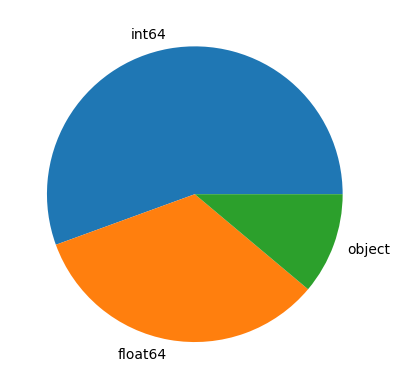

In [24]:
# test de visuel
data.dtypes.value_counts().plot.pie()

Text(0.5, 1.0, 'Scatter plot for diastolic pressure by age')

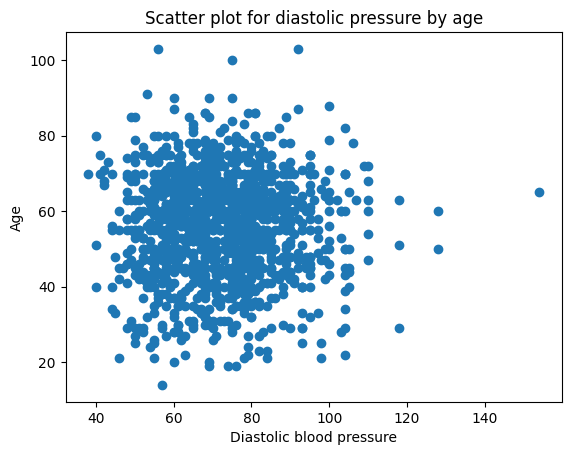

In [34]:
plt.scatter(data["Diastolic blood pressure"],data["Age"])
plt.xlabel("Diastolic blood pressure")
plt.ylabel("Age")
plt.title("Scatter plot for diastolic pressure by age")

Text(0.5, 1.0, 'Scatter plot of systolic pressure by age')

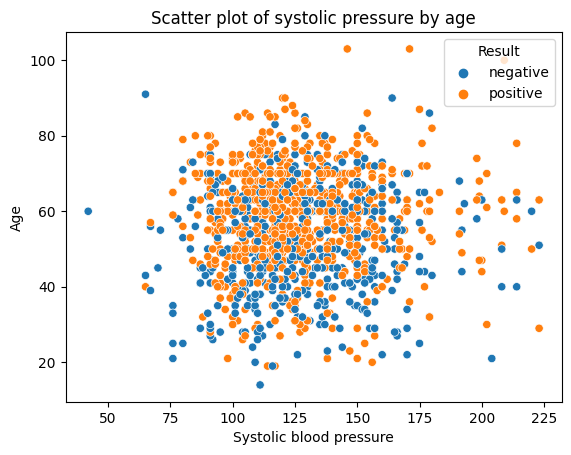

In [33]:
sns.scatterplot(data=data, x="Systolic blood pressure", y="Age", hue=data["Result"])
plt.title("Scatter plot of systolic pressure by age")

### Corrélation entre les variables

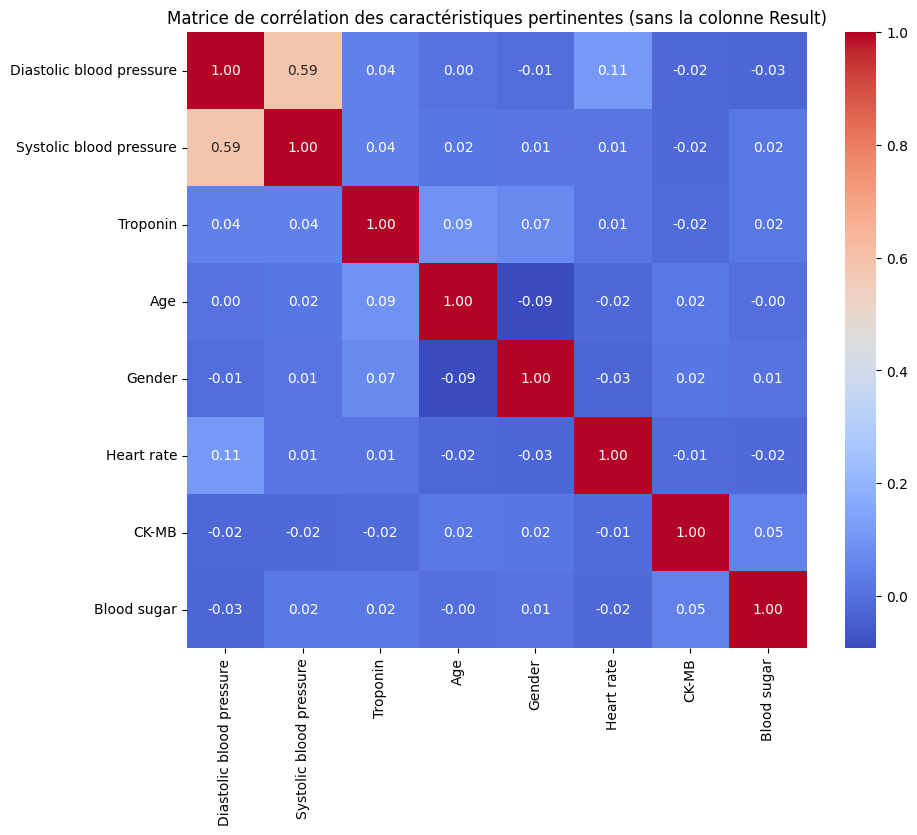

In [8]:
df_features_only = data.drop(columns=['Result'])

# Calculer la matrice de corrélation
correlation_matrix = df_features_only.corr()

# Filtrer les caractéristiques ayant une corrélation significative entre elles
relevant_features = correlation_matrix.abs().sum(axis=1).sort_values(ascending=False).index[:8]
df_subset = data[relevant_features]
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques pertinentes (sans la colonne Result)')
plt.show()

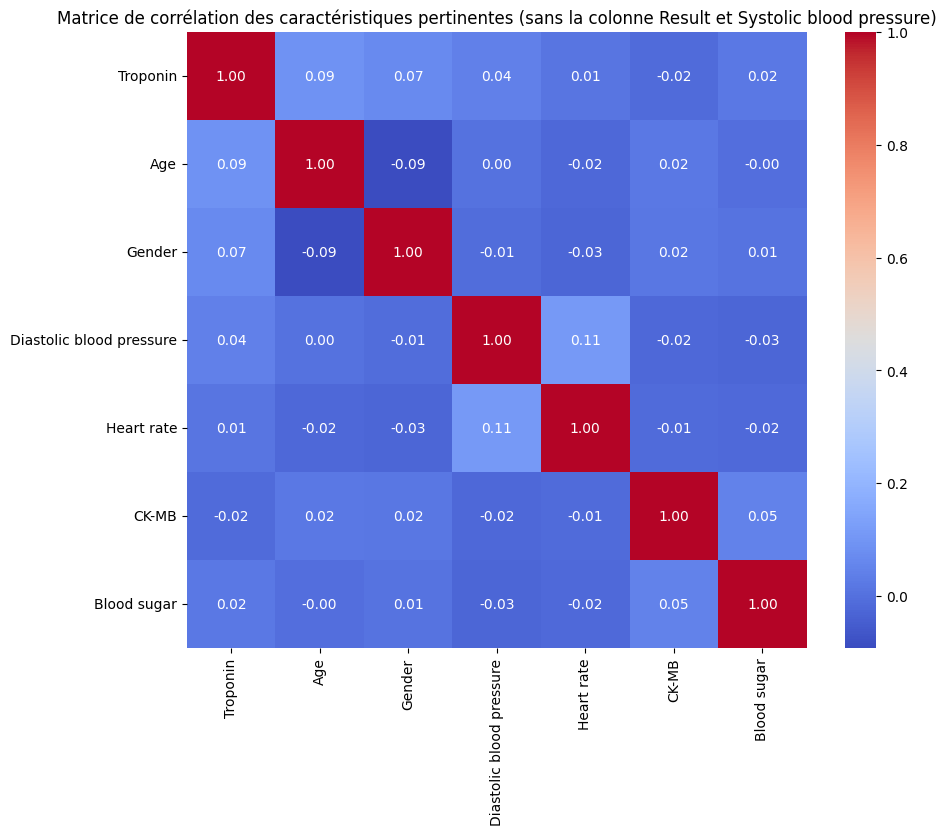

In [10]:
df_features_only = data.drop(columns=['Result','Systolic blood pressure'])

# Calculer la matrice de corrélation
correlation_matrix = df_features_only.corr()

# Filtrer les caractéristiques ayant une corrélation significative entre elles
relevant_features = correlation_matrix.abs().sum(axis=1).sort_values(ascending=False).index[:8]
df_subset = data[relevant_features]
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des caractéristiques pertinentes (sans la colonne Result et Systolic blood pressure)')
plt.show()

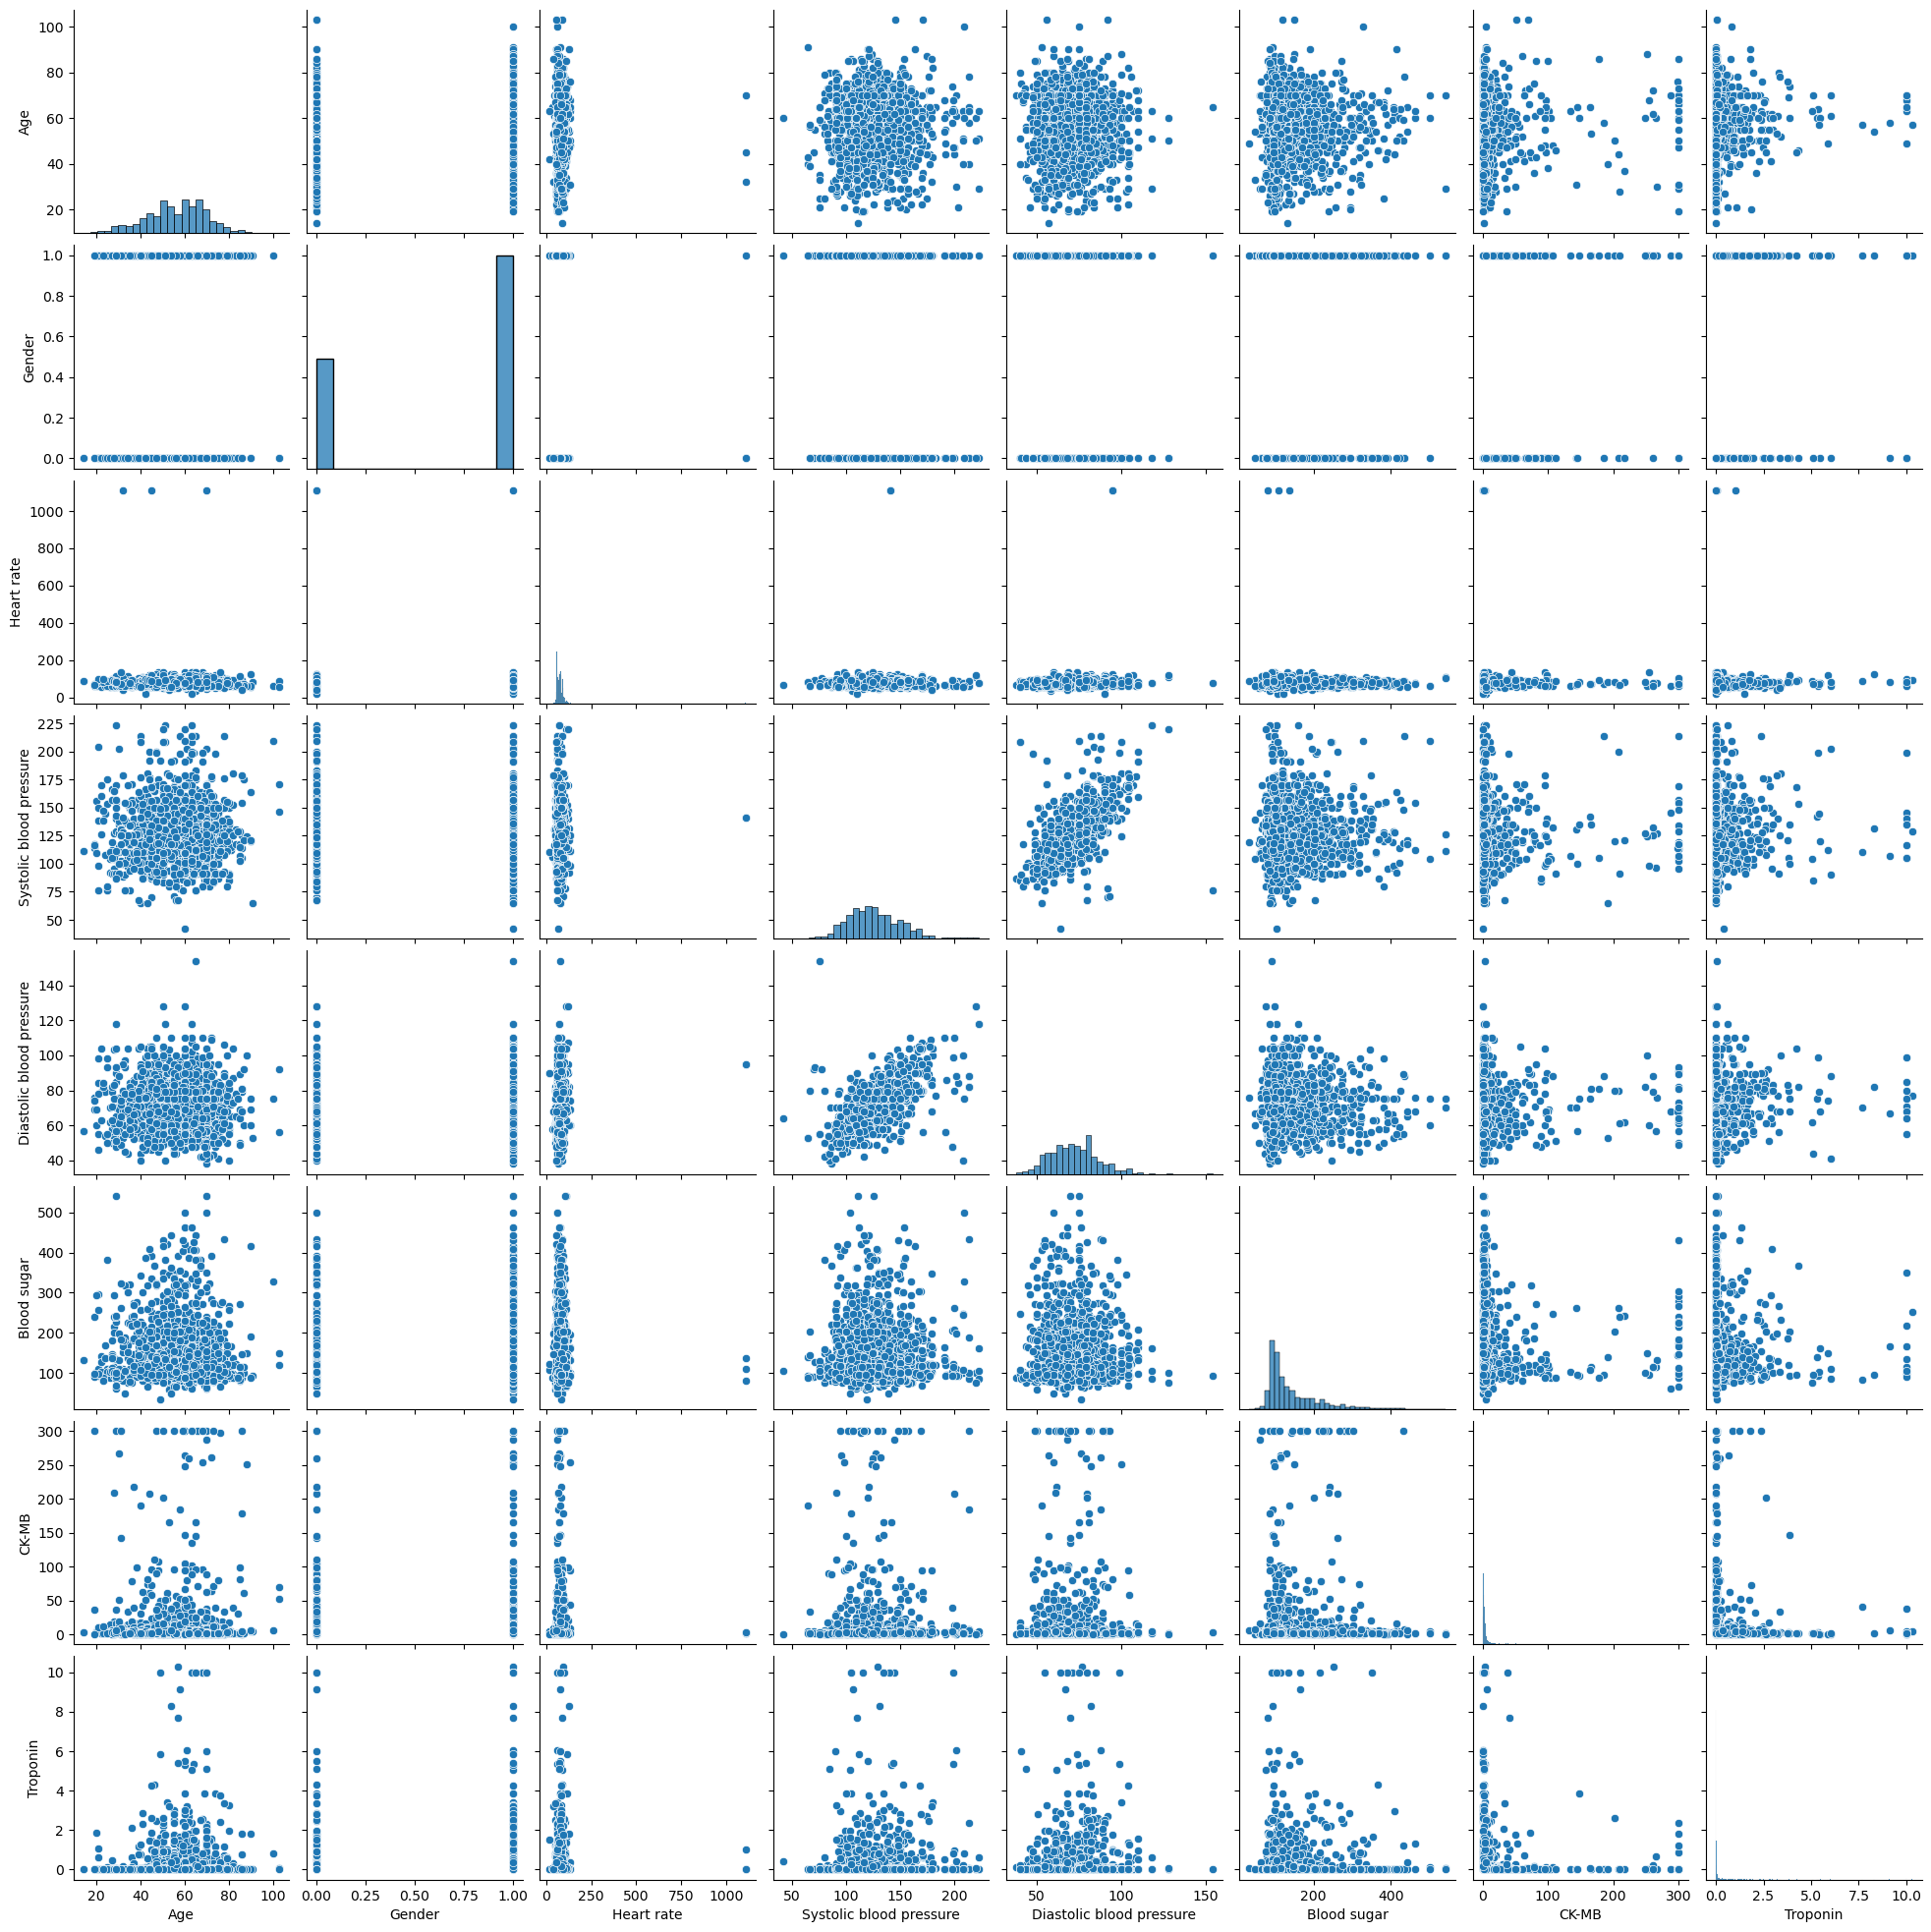

In [73]:
sns.pairplot(data)

<AxesSubplot:>

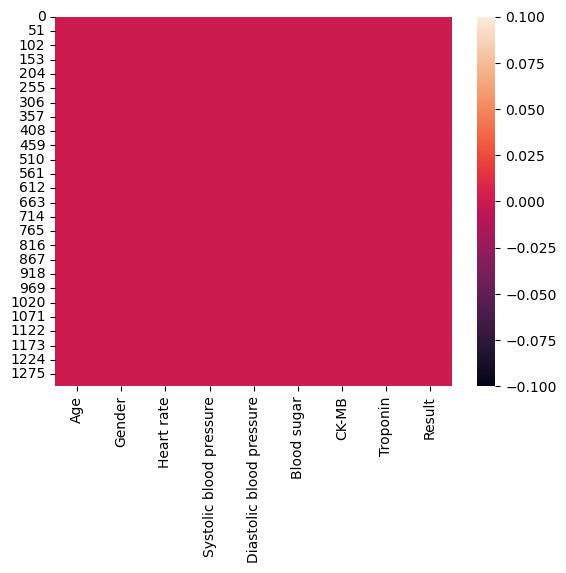

In [48]:
# inutile
sns.heatmap(data.isna())

## Analyse univariée

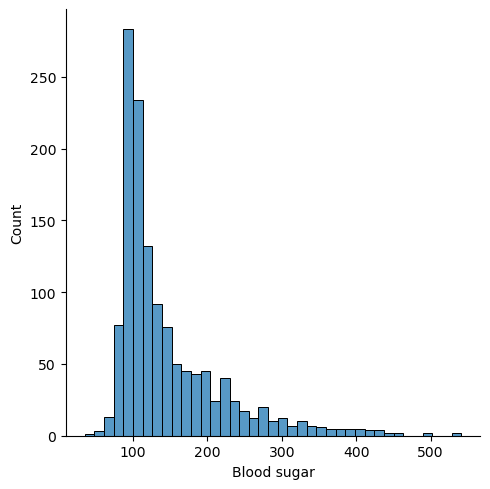

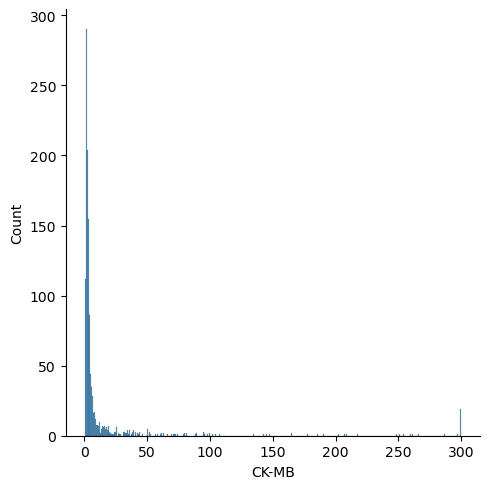

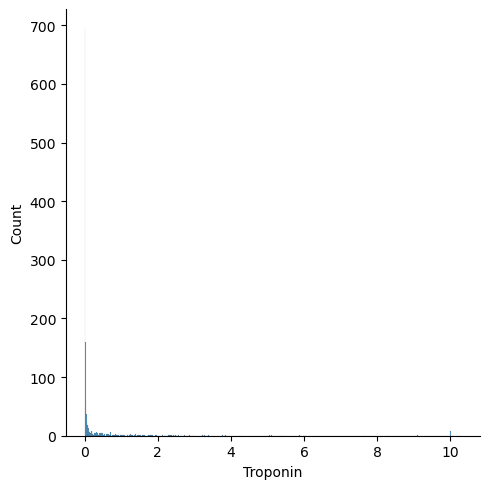

In [50]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.displot(data[col])

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


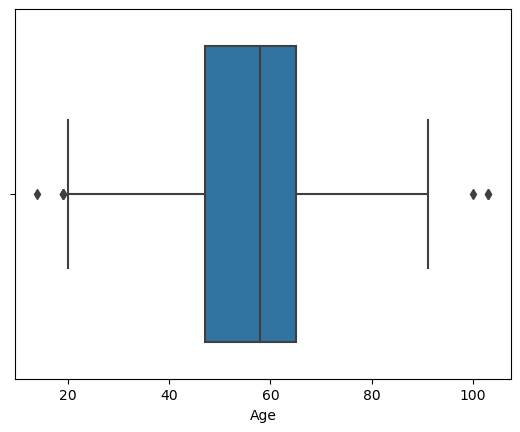

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


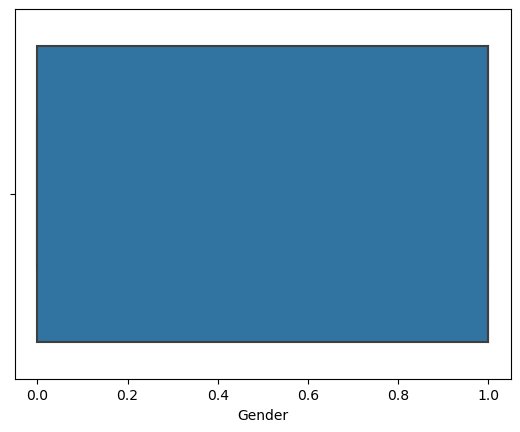

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


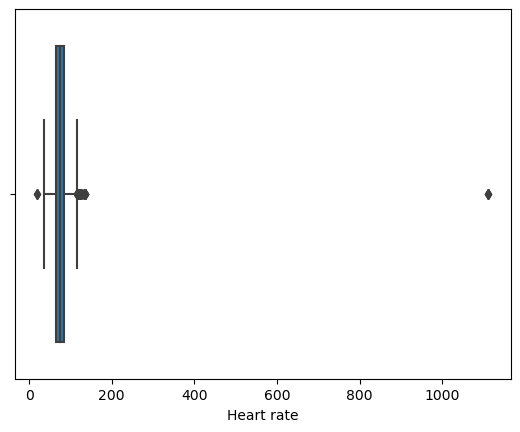

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


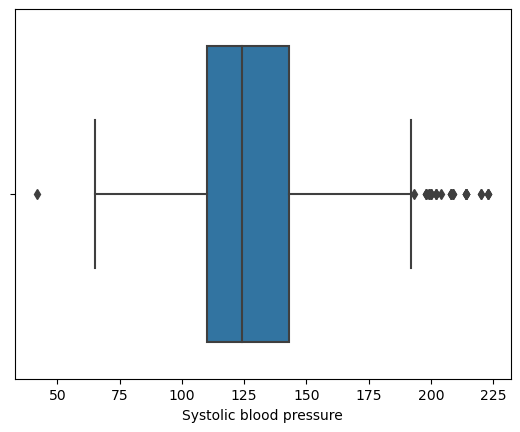

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


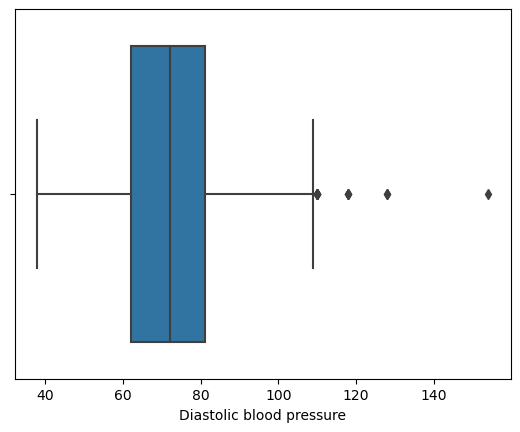

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


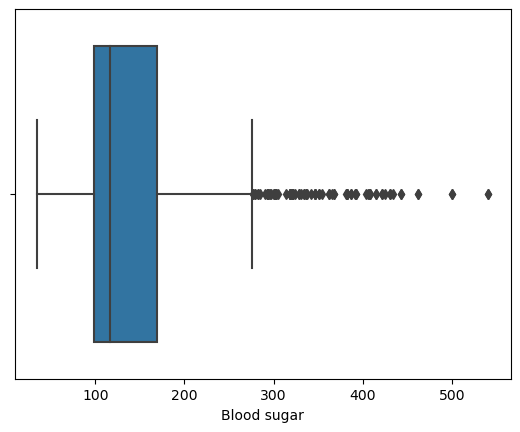

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


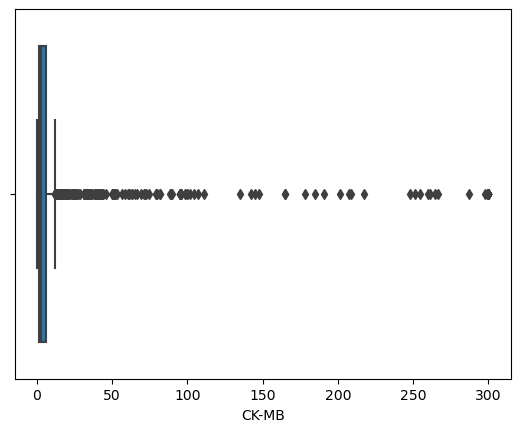

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


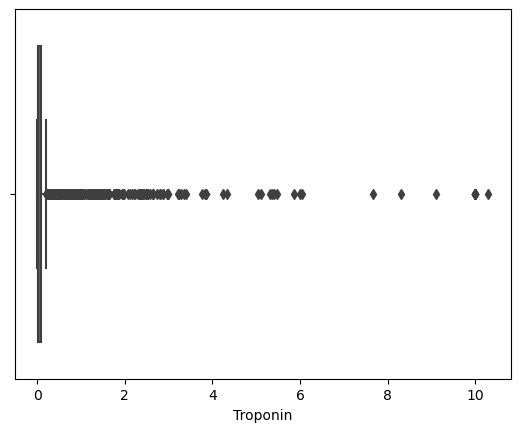

In [103]:
for col in data.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data[col])
    plt.show()

# Preprocessing

In [101]:
# nettoyage des outliers
data_clean = data.copy()
for col in data_clean.select_dtypes(['int','float']).columns:
    print(col)
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR, Q1-1.5*IQR, Q3+1.5*IQR)
    data_clean = data_clean[~((data_clean[col]<(Q1-1.5*IQR))|(data_clean[col]>(Q3+1.5*IQR)))]

Age
Gender
Heart rate
Systolic blood pressure
Diastolic blood pressure
Blood sugar
CK-MB
Troponin


/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


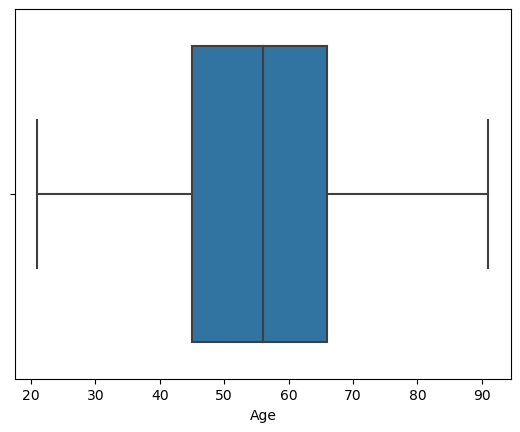

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


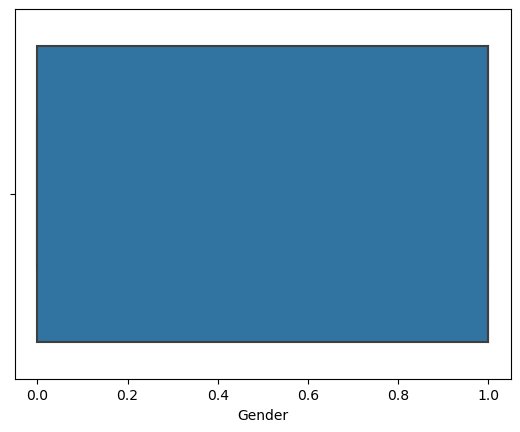

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


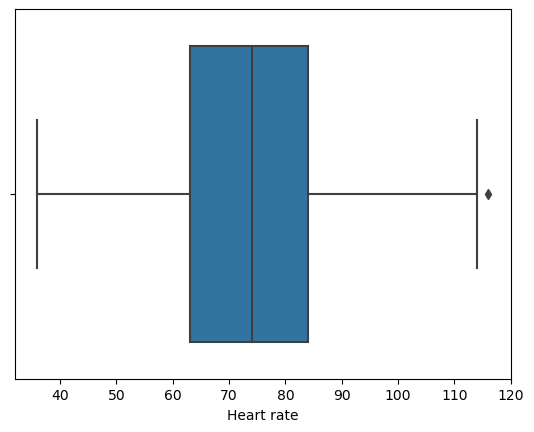

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


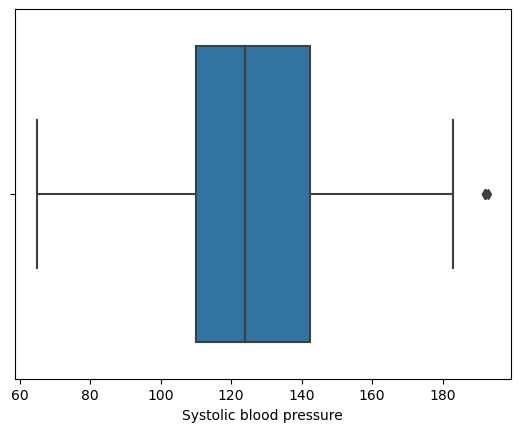

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


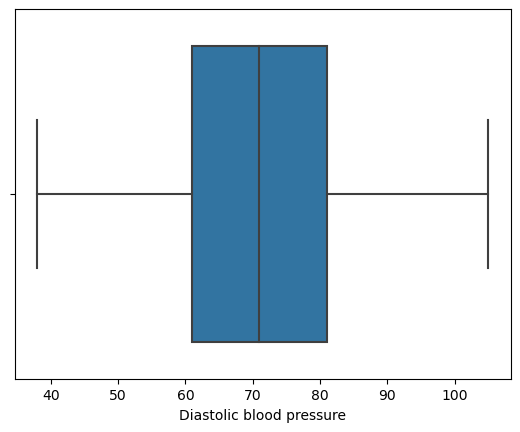

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


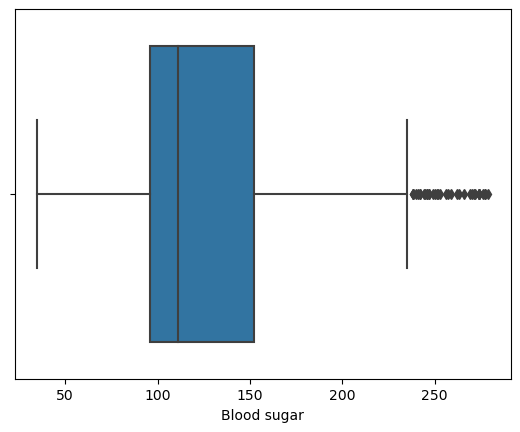

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


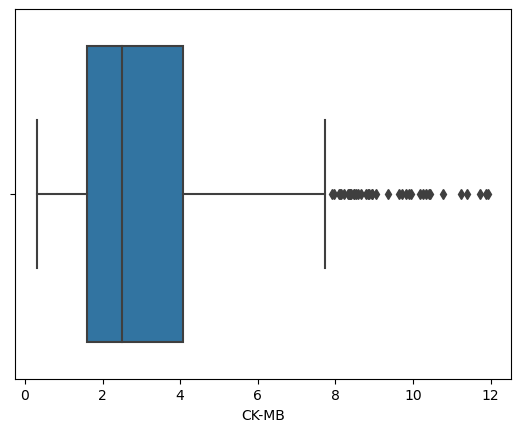

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


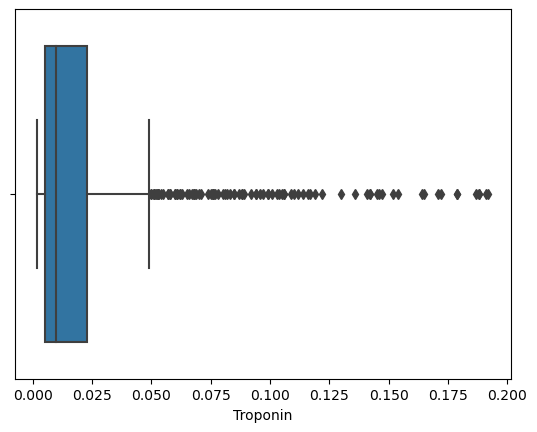

In [102]:
# visualisation de l'après nettoyage
for col in data_clean.select_dtypes(['int','float']):
    plt.figure
    sns.boxplot(data_clean[col])
    plt.show()

In [ ]:
# encodage des variables 


## Choix des variables à conserver pour les modèles

# Application des modèles

### Présentation des modèles

In [ ]:
mdl = ["DecisionTree", "RandomForest", "Adaboost", "SVM", "KNN", "Naif"]